# Backpropagation For Everyone

As of today, many problems are being solved using Artificial Neural Networks. The core of Artificial Neural Networks is the mechanism of how it is trained from experience or examples data. Every kind of neural network is trained using Backpropagation algorithm these days. 

In this notebook, I have coded the backpropagation from the scratch and have taught it from the begining.

The only pre
If you know python and you want to learn Backpropagation or Artificial Neural Networks, you are at the right place. This tutorial does not require any knowledge of Calculus. And even if you studied calculus earlier, you will find a number of new ideas.

Let us jump in.

# Getting Started

1. Clone this repository in your home directory
   
   `git clone https://github.com/cloudxlab/iitr-deep-learning-spl-tf2`


2. open 'backprop_from_scratch.ipynb' notebook in the folder



# Writing Functions - Python

A function is basically a sequence of operations. It may take inputs via arguments. And it may give the result by returning value.

Let us a function square which basically gives square of whatever we pass as argument.

You can visualize a function like this. There is input and there is output.

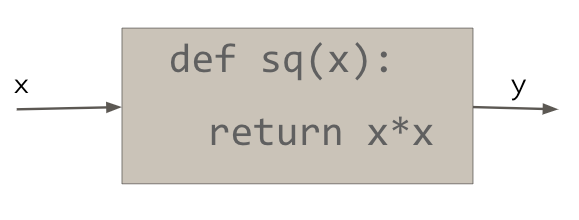

## Definition

In [54]:
def sq(x):
    return x*x

In [55]:
sq(4)

16

In [56]:
sq(10)

100

A function could also take multiple arguments

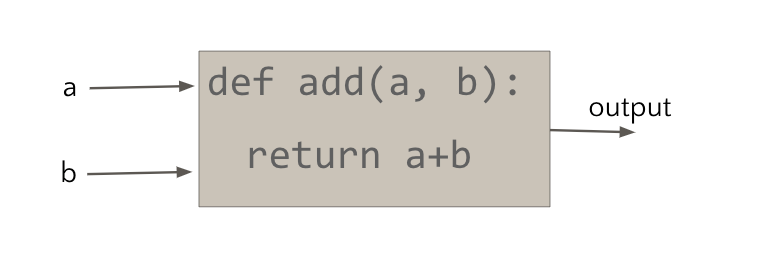

In [57]:
# function could also take multiple arguments
# Here a and b are the two arguments and function is returning a single value.
def add(a, b):
    return a+b
add(10, 20)

30

## Variable arguments to a function

In [58]:
# We can define functions with variable arguments
def sum(*args):
    s = 0
    for i in args:
        s += i
    return s

In [59]:
sum(1)

1

In [60]:
sum(2, 3)

5

## Calling a function with variable arguments

In [61]:
# If we have a usual function such as the following:

def add(a, b, c):
    return a+b+c

# we can call it using variable argument by putting an asterix
arr = range(3)
add(*arr)

3

## Passing a function as argument

In python, you can pass a function in another function just like another variable.

In [62]:
def double_it(x):
    return 2*x

def apply_transformation(f, arr):
    result = []
    for a in arr:
        v = f(a)
        result.append(v)
    return result
apply_transformation(double_it, [1,2,3])

[2, 4, 6]

In [63]:
# Similarly we can us another function - the one that we defined above.
apply_transformation(sq, [1,2,3])

[1, 4, 9]

# Differentiation

Differentiation is basically about finding the rate of change.

Rate of change of distance is velocity. Rate of change of velocity is acceleration.

If you plot rate of change of y with respect to x for a straight line y = mx +c , you will get a constant horizontal line.

If you plot, rate of change of y with respect to x for a parabola, it gives a straight line. 

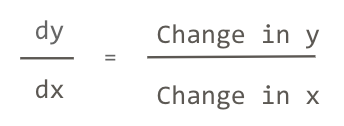

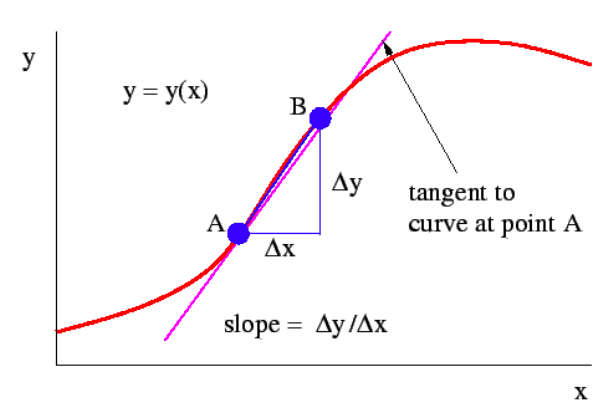

## Numeric Differentiation

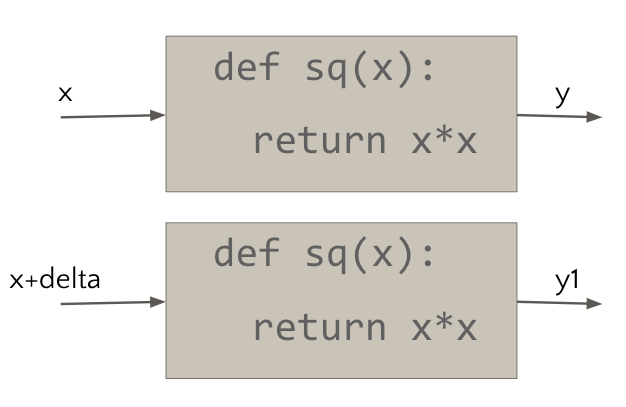

In [64]:
# Slightly increase x and compute the result. 
# Then compute the ratio of change in result with change in x

def diff(fn, x):
    delta = 0.000000000001
    y = fn(x)
    x1 = x + delta
    y1 = fn(x1)
    return (y1 - y)/(x1 - x)

In [65]:
diff(sq, 2)

4.0

In [66]:
x = 2
2*x

4

In [67]:
def cb(x):
    return x*x*x
cb(10)

1000

In [68]:
diff(cb, 2)

12.0

In [69]:
# If you know symbolic / algebric differentiation, 
# you would be knowing that the differentiation of an algebric function x^3 is 3*x^2.
# The result that we computed above is same as the algebric differentiation
x = 2
3*x^2

4

## Partial Derivative

If there is function which is taking multiple inputs, the rate of change of output could be computed with respect of any of the inputs. 


In [70]:

# Here is a very simple function
def fn(x1, x2):
    return x1*5 + x2*x2

# Lets calculate the rate of change of output of this function wrt x1
x1 = 10
x2 = 20
delta_x = 0.000000000001

delta_y = fn(x1+delta_x, x2) - fn(x1, x2)
df_dx1 = delta_y / delta_x

print(df_dx1)

5.002220859751105


In [71]:
# Now, lets calculate the rate of change of output of this function wrt x2

delta_y = fn(x1, x2+delta_x) - fn(x1, x2)
df_dx2 = delta_y / delta_x
print(df_dx2)

39.960923459148034


In [72]:
### Now, let us generalize it a bit

import numpy as np

# The first argument is the function, 
# second argument is the idx of the input with respect to which we are differentiating.
# Third arguments is a variable arguments - there can be many values. The function is called with these values.

def diffp(fn, idx, *args):
    delta = 0.000000000001
    
    # Call the underlying function with args as such
    y = fn(*args)
    
    # Now, increase only one input - at idx.
    args = list(args)
    args[idx] += delta
    
    # Now, calulate the output after changing one of the inputs a little bit.
    y1 = fn(*args)
    return (y1 - y)/delta


In [73]:
# Let us test it using a very simple function.
# This function can be differentiated with respect to m, c or x.
def line_y(m, c, x):
    return m*x + c

# Notice how we are passing the function as the first argument.
# The second argument is the index of the value with respect to which we are differentiating
# Remaining values are the values of the arguments to be passed while calling line_y
diffp(line_y, 0, 1, 2, 3) # differentiate wrt m

3.000266701747023

In [74]:
diffp(line_y, 1, 1, 2, 3) # differentiate wrt c

1.000088900582341

In [75]:
diffp(line_y, 2, 1, 2, 3) # differentiate wrt x

1.000088900582341

## Chain Rule

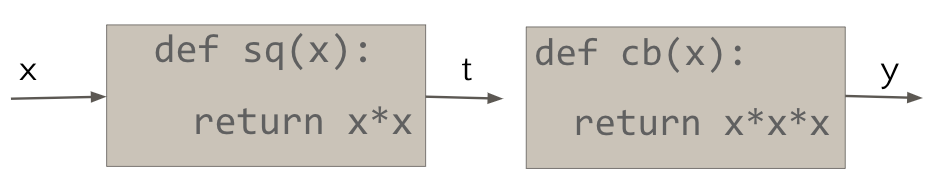

In [76]:
# If we have a sequence of functions as mentioned above, we can represent it using another function:
def sq(x):
    return x*x

def cb(t):
    return t*t*t

def sqcb(x):
    t = sq(x)
    y = cb(t)
    return y


In [77]:
# Differentiating it will be really straightforward
diffp(sqcb, 0, 2)

192.01706891180947

Third method:

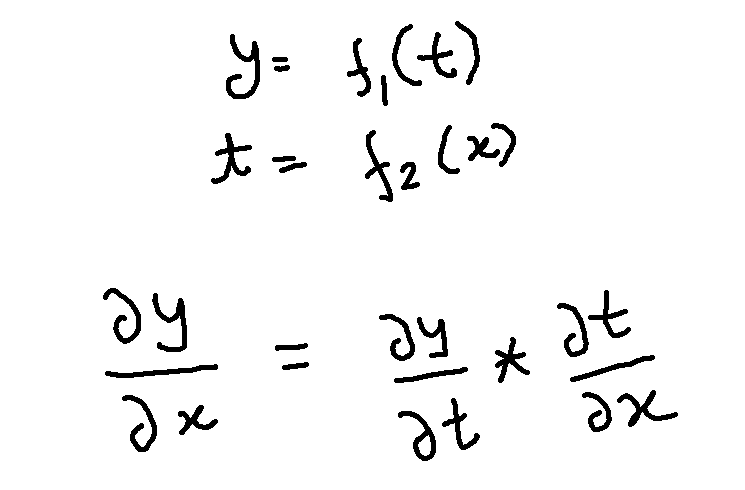

In [78]:
x = 2
d_sq = diffp(sq, 0, x)

In [79]:
t = sq(2)
d_cb = diffp(cb, 0, t)

In [80]:
d_sq * d_cb

192.03413934105515

# Gradient descent

When we have a function and we want to find out at what point this function would attain a minima or maxima.
See more here: https://youtu.be/4Cu9fizAtAo

In [81]:
# Let us first generate some data

import numpy as np

# Generate 100 random numbers
X = 2*np.random.random((100, 1))

In [82]:
# Now, let us generate the values of y corresponding to a line with slope 3 and intercept 4
# plus some noise
y = 4 + 3 * X + .3*np.random.randn(100, 1)

In [83]:
# Let us take a look at first three records
y[0:3]

array([[7.632526  ],
       [7.13153291],
       [5.29728805]])

In [84]:
X[0:3]

array([[1.32540905],
       [1.1739854 ],
       [0.38225426]])

In [85]:
4+3*X[0:3]

array([[7.97622714],
       [7.52195621],
       [5.14676279]])

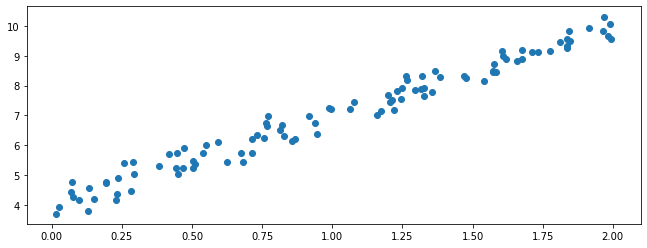

In [86]:
# Let us plot it using matplotlib

from matplotlib import pyplot as plt

plt.figure(figsize=(11,4))
plt.scatter(X, y)
plt.show()

# horizontal axis is x and vertical axis is y

In [87]:
def error(m, c, X, y):
    ypred = m*X + c
    err = ypred-y
    return np.sum(err*err)

In [88]:
error(3, 4, np.array([1,2,3]), np.array([1,2,3]))

200

In [89]:
error(3, 4, X, y)

9.018290293261678

In [90]:
def grad_fit(X, y):
    m = np.random.random()
    c = np.random.random()
    learning_rate = 0.001
    for i in range(100):
        dE_dm = diffp(error, 0, m, c, X, y)
        dE_dc = diffp(error, 1, m, c, X, y)
        
        m = m - learning_rate * dE_dm
        c = c - learning_rate * dE_dc
    return (m, c)

In [91]:
m, c = grad_fit(X, y)

/usr/local/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:15: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  from ipykernel import kernelapp as app


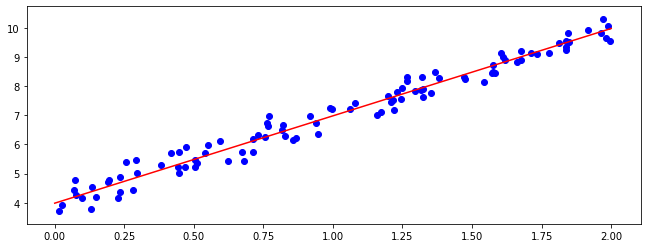

In [92]:
from matplotlib import pyplot as plt

x1 = 0
x2 = 2

y1 = m*x1 + c
y2 = m*x2 + c

ycap = m*X + c
plt.figure(figsize=(11,4))
plt.subplot()

# plt.scatter(X, ycap, color='r')
plt.plot([x1, x2], [y1, y2], color = 'r')
plt.subplot()
plt.scatter(X, y, color='b')
plt.show()

# Backpropagation

Learn more about neural networks and backpropagation here: https://youtu.be/4Cu9fizAtAo?t=1652


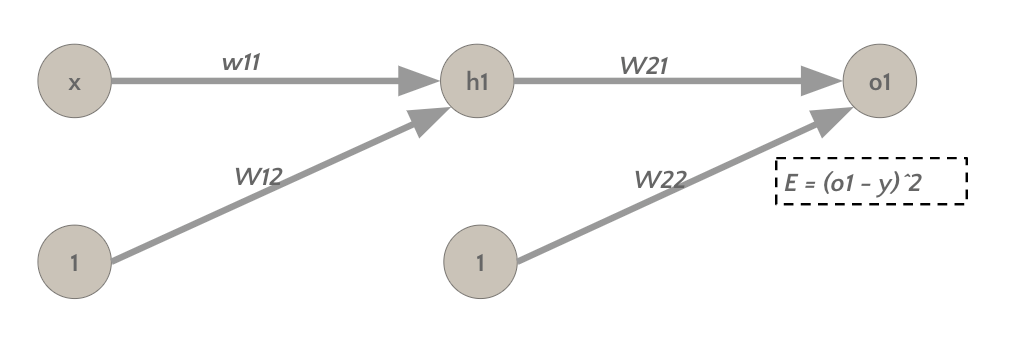

In [93]:
## Generate Data
import numpy as np

X = np.random.random((100, 1))
y = 4 + 3 * X + .3*np.random.randn(100, 1)


In [94]:
def neuron(w11, w12, x):
    # We will talk about Activation function later.
    r = w11*x + w12
    return r

def forward_nn(w11, w12, w21, w22, x):
    h1 = neuron(w11, w12, x)
    o1 = neuron(w21, w22, h1)
    return o1

def sq_error(o1, yy):
    e = o1 - yy
    return e*e

def error_nn(w11, w12, w21, w22, x, yy):
    o1 = forward_nn(w11, w12, w21, w22, x)
    e = o1 - yy
    return e*e


In [95]:
w11 = 0.5
w12 = 0.5
w21 = 0.5
w22 = 0.5

learning_rate = 0.001

for epoch in range(100):
    for i in range(len(X)):
        x = X[i]
        yy = y[i]
        
        dE_dw11 = diffp(error_nn, 0, w11, w12, w21, w22, x, yy)
        dE_dw12 = diffp(error_nn, 1, w11, w12, w21, w22, x, yy)
        dE_dw21 = diffp(error_nn, 2, w11, w12, w21, w22, x, yy)
        dE_dw22 = diffp(error_nn, 3, w11, w12, w21, w22, x, yy)
        
        w11 = w11 - learning_rate * dE_dw11
        w12 = w12 - learning_rate * dE_dw12
        
        w21 = w21 - learning_rate * dE_dw21
        w22 = w22 - learning_rate * dE_dw22

In [96]:
ycap = forward_nn(w11, w12, w21, w22, X)

/usr/local/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:6: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  


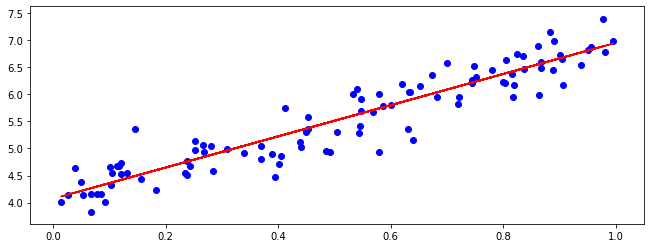

In [97]:
from matplotlib import pyplot as plt

plt.figure(figsize=(11,4))
plt.subplot()
plt.plot(X, ycap, color='r')
plt.subplot()
plt.scatter(X, y, color='b')
plt.show()

## Further Improvements - Backpropagation


In [98]:
# Initialize
w11 = 0.5
w12 = 0.5
w21 = 0.5
w22 = 0.5

def neuron(w11, w12, x):
    return w11*x + w12

def sq_error(o1, yy):
    e = o1 - yy
    return e*e

# Learning Rate
eta = 0.01

for epoch in range(50):
    for i in range(len(X)):
        x = X[i]
        yy = y[i]
        
        #Forward Pass
        h1 = neuron(w11, w12, x)
        o1 = neuron(w21, w22, h1)

        dE_do1 = diffp(sq_error, 0, o1, yy)
        do1_dw21 = diffp(neuron, 0, w21, w22, h1)
        dE_w21 = dE_do1 * do1_dw21
        
        do1_dw22 = diffp(neuron, 1, w21, w22, h1)
        dE_w22 = dE_do1 * do1_dw22
        
        do1_dh = diffp(neuron, 2, w21, w22, h1)
        dE_dh = dE_do1 * do1_dh
        dh_dw11 = diffp(neuron, 0, w11, w12, x)
        dE_dw11 = dE_dh * dh_dw11

        dh_dw12 = diffp(neuron, 1, w11, w12, x)
        dE_dw12 = dE_do1 * do1_dh * dh_dw12
        
        w11 = w11 - eta * dE_dw11
        w12 = w12 - eta * dE_dw12

        w21 = w21 - eta * dE_w21
        w22 = w22 - eta * dE_w22
        def neuron(w11, w12, x):
            return w11*x + w12

/usr/local/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:13: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  del sys.path[0]


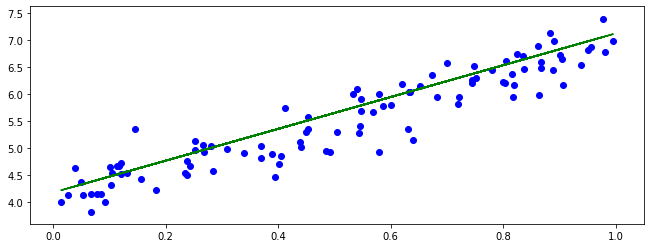

In [100]:
# ycap = forward_nn(w11, w12, w21, w22, X)

h1 = neuron(w11, w12, X)
ycap1 = neuron(w21, w22, h1)

from matplotlib import pyplot as plt

plt.figure(figsize=(11,4))
# plt.subplot()
# plt.scatter(X, ycap, color='r')
plt.subplot()
plt.plot(X, ycap1, color='g')
plt.subplot()
plt.scatter(X, y, color='b')
plt.show()


## Extensions

1. Neurons are many. Weight are computed in a single shot using numpy.
2. The layers are many and the code needs to be flexible to stictch many layers flexible
3. Neuron definition is complex - activation function